In [12]:
import pykasso as pk
domain = pk.SKS('notebooks/test')

In [13]:
domain.load_settings()

{'sks': {'nsim': 10}, 'grid': {'x0': 572510, 'y0': 250010, 'z0': 430, 'nx': 310, 'ny': 300, 'nz': 100, 'dx': 20, 'dy': 20, 'dz': 20}, 'mask': {'name': 'Mask', 'data': 'notebooks/test/inputs/betteraz_polygon.txt'}, 'geology': {'name': 'Geology', 'data': 'notebooks/test/inputs/side2.png', 'axis': 'x'}, 'debug': {'warnings': True}, 'karst': {'name': 'karst', 'data': ''}, 'field': {'name': 'field', 'data': ''}}
{'outlets': {'number': 2, 'data': [[501, 500], [502, 500], [503, 500], [504, 500]], 'shuffle': False, 'importance': [1]}, 'inlets': {'number': 50, 'data': '', 'shuffle': False, 'per_outlet': [1], 'importance': [1]}, 'tracers': {'number': 1, 'data': ''}, 'faults': {'name': 'Faults', 'data': ''}, 'fractures': {'name': 'Fractures', 'data': 'random', 'settings': {'hypothesis': '', 'densities': [1e-06, 1e-05], 'orientation_min': [340, 70], 'orientation_max': [20, 110], 'dip_min': [80, 40], 'dip_max': [90, 50], 'alpha': [2, 2], 'length_min': [100, 100], 'length_max': [1000, 1000]}}}


In [14]:
domain.construct_features()

In [15]:
import numpy as np
import pykasso.visualization as pkv

In [16]:
# grid
# pkv.show(domain, feature='grid', engine='pyvista')

In [17]:
# geology - fractures
settings = {
    'ghost'   : [0],
    # 'mask'    : True,
}
# pkv.show(domain, feature='topography', engine='pyvista', settings=settings)

In [18]:
domain.TOPOGRAPHY.data.shape

(310, 300, 100)

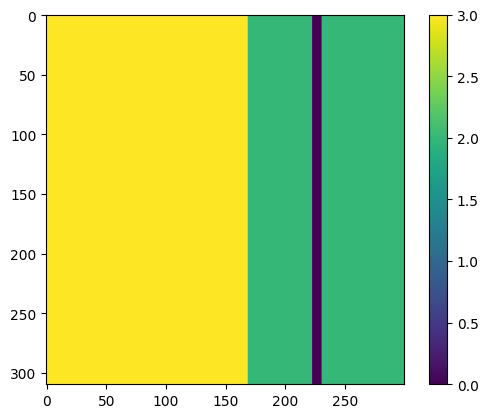

In [19]:
data = domain.GEOLOGY.surface
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.imshow(data)
plt.colorbar()

In [20]:
# ### V Visualization
# import pyvista as pv
# pv.global_theme.notebook = False
# p = pv.Plotter()

# for (i, polygon) in enumerate(POLYGONS):
#     p.add_mesh(polygon, show_edges=True, opacity=0.5, color="w", lighting=False)

# for (i, points) in enumerate(POINTS):
#     intersection = pv.PolyData(points)
#     try:
#         p.add_mesh(intersection, color="maroon", point_size=25, label="Intersection Points")
#     except:
#         pass

# # for (i, ray) in enumerate(RAYS):
# #     p.add_mesh(ray, color="blue", line_width=5, label="Ray Segment n{}".format(i))

# p.show_bounds()
# # p.add_legend()
# p.show()

In [21]:
# import pykasso.tools as pkt
# pkt.read_gslib('notebooks/test4/inputs/betteraz_2D_z430.gslib', 1)

In [22]:
# def read_gslib(file):
#     import numpy as np
#     with open(file) as f:
#         data = f.readlines()
#     nvar = int(data[1])
#     lines_to_skip = nvar + 2
#     ndata = np.genfromtxt(file, skip_header=lines_to_skip)
#     return ndata

# read_gslib('notebooks/test4/inputs/betteraz_2D_z430.gslib')